In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# import dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('./data/Ames_Real_Estate_Data.csv')

D:\Software\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Basic EDA

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
housing.sort_values('SalePrice', ascending=False).head(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
8,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
326,528320060,3627,625000,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1831,1796,0,1.0,0.0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3.0,807.0,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
66,528164060,2470,615000,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,Ex,7,Typ,2,Gd,Attchd,2003.0,Fin,3.0,789.0,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
585,528150070,2364,611657,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial
640,528110020,2674,610000,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,2674,0,0,2.0,0.0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2007.0,Fin,3.0,762.0,TA,TA,Y,360,50,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal


Text(0.5, 1.0, 'Price Distribution')

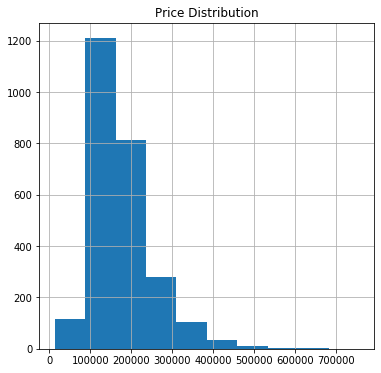

In [5]:
plt.figure(figsize=(6,6))
housing['SalePrice'].hist()
plt.title('Price Distribution')

In [6]:
print('SalePrice Mean: ', np.mean(housing.SalePrice))

upper_lim = np.mean(housing.SalePrice) + 3 * np.std(housing.SalePrice)
lower_lim = np.mean(housing.SalePrice) - 3 * np.std(housing.SalePrice)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

SalePrice Mean:  178059.62325581396
Outliers are above 403109.26 and below -46990.02


Text(0.5, 1.0, 'Log Price Distribution')

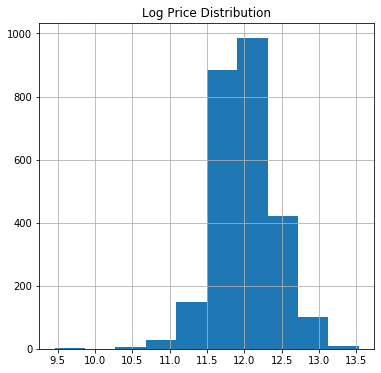

In [7]:
housing['LogSalePrice'] = np.log(housing.SalePrice)
housing['LogGrLivArea'] = np.log(housing.GrLivArea)
housing['LogLotArea'] = np.log(housing.LotArea)
plt.figure(figsize=(6,6))
housing['LogSalePrice'].hist()
plt.title('Log Price Distribution')

In [8]:
print('Log SalePrice Mean: %.1f' % np.mean(housing.LogSalePrice))

upper_lim = np.mean(housing.LogSalePrice) + 3.5 * np.std(housing.LogSalePrice)
lower_lim = np.mean(housing.LogSalePrice) - 3.5 * np.std(housing.LogSalePrice)
print('Outliers are above %.1f and below %.1f' % (upper_lim, lower_lim))

Log SalePrice Mean: 12.0
Outliers are above 13.4 and below 10.7


In [9]:
housing[housing.LogSalePrice > 13.4].sort_values('LogSalePrice', ascending=False)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice,LogGrLivArea,LogLotArea
8,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534473,8.370084,9.977435


In [10]:
housing[housing.LogSalePrice < 10.7].sort_values('LogSalePrice', ascending=False)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice,LogGrLivArea,LogLotArea
741,911102170,1317,40000,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,10.596635,7.183112,9.047821
918,534450090,334,39300,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,10.578980,5.811141,8.517193
645,911175430,480,35311,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,10.471950,6.173786,9.104980
336,909101330,498,35000,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,498.0,498.0,GasA,TA,N,FuseF,498,0,0,0.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,Detchd,1922.0,Unf,1.0,216.0,Fa,Fa,N,0,0,100,0,0,0,NaN,NaN,NaN,0,2,2006,ConLD,Normal,10.463103,6.210600,8.998137
559,902477120,720,34900,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,10.460242,6.579251,8.971956
428,902207130,832,12789,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml,9.456341,6.723832,9.175335


In [11]:
housing = housing[np.logical_and(housing.LogSalePrice > 10.7, housing.LogSalePrice < 13.4)]

In [12]:
# merge neighborhoods from two data sets and compare
real_estate.rename(columns = {'MapRefNo':'PID'}, inplace = True) 
real_estate = real_estate[['PID', 'Neighborhood']]
housing = housing.merge(real_estate, how='left', on='PID', suffixes=('_h','_r'))
housing.drop_duplicates(subset = ['PID'], inplace=True)

Text(0.5, 1.0, 'Nieghborhood Distribution before merge')

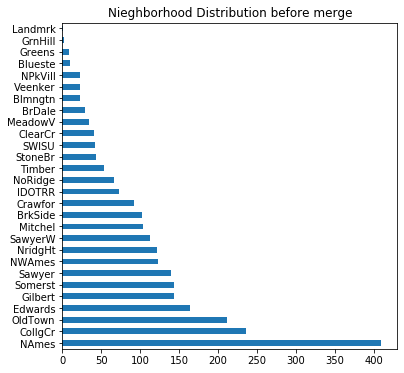

In [13]:
plt.figure(figsize=(6,6))
housing['Neighborhood_h'].value_counts().plot(kind='barh')
plt.title('Nieghborhood Distribution before merge')

Text(0.5, 1.0, 'Nieghborhood Distribution after merge')

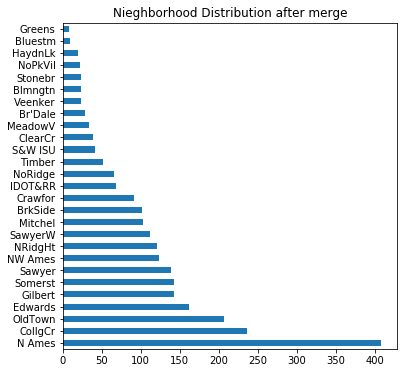

In [14]:
plt.figure(figsize=(6,6))
housing['Neighborhood_r'].value_counts().plot(kind='barh')
plt.title('Nieghborhood Distribution after merge')

In [15]:
housing[housing.Neighborhood_h != housing.Neighborhood_r].shape

(888, 85)

In [16]:
housing[housing.Neighborhood_h != housing.Neighborhood_r][['Neighborhood_h', 'Neighborhood_r']]

,Neighborhood_h,Neighborhood_r
0,SWISU,S&W ISU
3,IDOTRR,IDOT&RR
5,NWAmes,NW Ames
11,NridgHt,NRidgHt
14,NAmes,N Ames
...,...,...
2600,NAmes,N Ames
2601,NAmes,N Ames
2604,IDOTRR,IDOT&RR
2605,NAmes,N Ames


In [17]:
housing.Neighborhood_h.value_counts()

NAmes      410
CollgCr    236
OldTown    212
Edwards    164
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    102
Crawfor     92
IDOTRR      73
NoRidge     66
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood_h, dtype: int64

In [18]:
housing.Neighborhood_r.value_counts()

N Ames     408
CollgCr    236
OldTown    207
Edwards    162
Gilbert    143
Somerst    143
Sawyer     139
NW Ames    123
NRidgHt    121
SawyerW    112
Mitchel    103
BrkSide    102
Crawfor     92
IDOT&RR     69
NoRidge     66
Timber      52
S&W ISU     41
ClearCr     39
MeadowV     34
Br'Dale     29
Veenker     23
Blmngtn     23
Stonebr     23
NoPkVil     22
HaydnLk     20
Bluestm     10
Greens       8
Name: Neighborhood_r, dtype: int64

In [19]:
housing[housing.Neighborhood_r=='HaydnLk']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_h,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice,LogGrLivArea,LogLotArea,Neighborhood_r
282,527212040,2576,361919,60,RL,82.0,12438,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,466.0,Ex,TA,PConc,Ex,Gd,No,Unf,0.0,Unf,0.0,1234.0,1234.0,GasA,Ex,Y,SBrkr,1264,1312,0,0.0,0.0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3.0,666.0,TA,TA,Y,324,100,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,12.799176,7.853993,9.428512,HaydnLk
292,527254020,2046,372500,20,RL,80.0,11844,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,464.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0.0,Unf,0.0,2046.0,2046.0,GasA,Ex,Y,SBrkr,2046,0,0,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,834.0,TA,TA,Y,322,82,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,12.827992,7.623642,9.379577,HaydnLk
413,527214060,2698,535000,60,RL,82.0,16052,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,734.0,Ex,TA,PConc,Ex,TA,No,GLQ,1206.0,Unf,0.0,644.0,1850.0,GasA,Ex,Y,SBrkr,1850,848,0,1.0,0.0,2,1,4,1,Ex,11,Typ,1,Gd,Attchd,2006.0,RFn,3.0,736.0,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,13.190022,7.900266,9.683589,HaydnLk
473,527214030,1884,387000,20,RL,53.0,15401,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,296.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1337.0,Unf,0.0,547.0,1884.0,GasA,Ex,Y,SBrkr,1884,0,0,1.0,0.0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2004.0,Fin,3.0,670.0,TA,TA,Y,214,76,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.866180,7.541152,9.642188,HaydnLk
528,527258010,1856,394432,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,12.885202,7.526179,9.340842,HaydnLk
601,527252090,1714,318000,120,RL,60.0,8147,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,230.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1191.0,Unf,0.0,523.0,1714.0,GasA,Ex,Y,SBrkr,1714,0,0,1.0,0.0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2.0,517.0,TA,TA,Y,156,55,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,12.669807,7.446585,9.005405,HaydnLk
602,527258020,1530,260000,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274.0,Unf,0.0,256.0,1530.0,GasA,Ex,Y,SBrkr,1530,0,0,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2.0,430.0,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,12.468437,7.333023,9.690171,HaydnLk
620,527216080,2338,591587,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,NaN,NaN,NaN,0,6,2007,New

In [20]:
housing[housing.Neighborhood_h=='Landmrk']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_h,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice,LogGrLivArea,LogLotArea,Neighborhood_r
1220,907230240,1320,137000,160,RH,NaN,3612,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,NaN,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,11.827736,7.185387,8.192017,NaN


**Conclusion:** Keep oringinal neighborhoods and drop neighborhoods that are too small

In [22]:
housing.rename(columns = {'Neighborhood_h':'Neighborhood'}, inplace = True) 

########################################################################################
########################################################################################
# Isabel - keep everything below here
########################################################################################
########################################################################################

# Stephen's Basic EDA

Checking features for bad or sparse classes that we want to remove for linear model.

Text(0.5, 1.0, 'Nieghborhood Distribution')

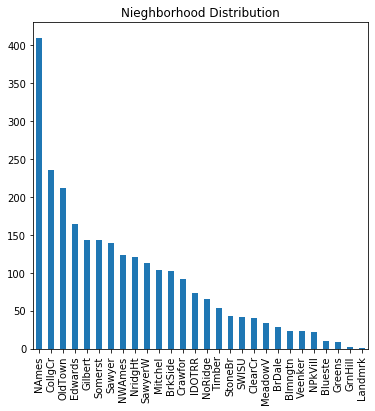

In [23]:
plt.figure(figsize=(6,6))
housing['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Nieghborhood Distribution')

Text(0.5, 1.0, 'Building Type Distribution')

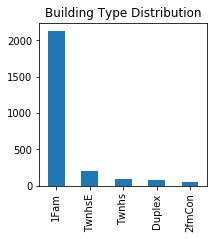

In [24]:
plt.figure(figsize=(3,3))
housing['BldgType'].value_counts().plot(kind='bar')
plt.title('Building Type Distribution')

Text(0.5, 1.0, 'Distribution of Zoning')

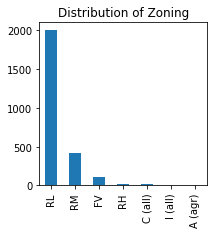

In [25]:
plt.figure(figsize=(3,3))
housing.MSZoning.value_counts().plot(kind='bar')
plt.title('Distribution of Zoning')

Text(0.5, 1.0, 'Distribution of Functional Features')

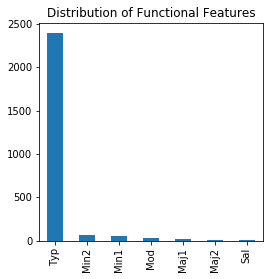

In [26]:
plt.figure(figsize=(4,4))
housing.Functional.value_counts().plot(kind='bar')
plt.title('Distribution of Functional Features')

Text(0.5, 1.0, 'Distribution of Sale Types')

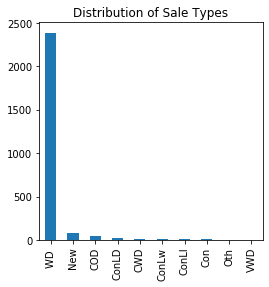

In [27]:
plt.figure(figsize=(4,4))
housing.SaleType.value_counts().plot(kind='bar')
plt.title('Distribution of Sale Types')

Text(0.5, 1.0, 'Distribution of Sale Condition')

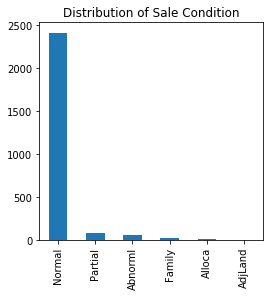

In [28]:
plt.figure(figsize=(4,4))
housing.SaleCondition.value_counts().plot(kind='bar')
plt.title('Distribution of Sale Condition')

Text(0.5, 1.0, 'Bedroom Count Distribution')

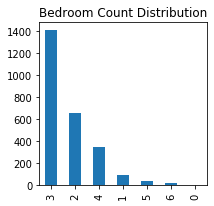

In [29]:
plt.figure(figsize=(3,3))
housing['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('Bedroom Count Distribution')

# Analyze Montly Sale Prices

Text(0.5, 1.0, 'Monthly Sale Price')

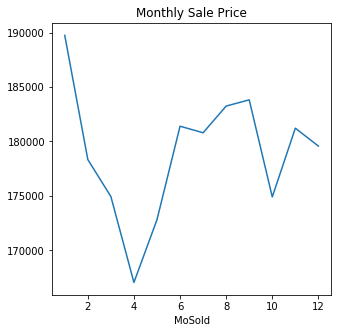

In [30]:
plt.figure(figsize=(5,5))
housing.groupby('MoSold').agg({'SalePrice':'mean'})['SalePrice'].plot()
plt.title('Monthly Sale Price')

In [31]:
mo_sale = housing.groupby('MoSold').agg({'SalePrice':'mean'}).sort_values('SalePrice', ascending=False).reset_index()
mo_sale.index.names = ['DescOrder']
mo_sale

,MoSold,SalePrice
DescOrder,,
0,1,189749.282828
1,9,183824.374046
2,8,183253.896373
3,6,181402.390830
4,11,181221.560345
5,7,180802.000000
6,12,179577.244186
7,2,178340.815126
8,3,174941.899522


Text(0.5, 0, 'Order')

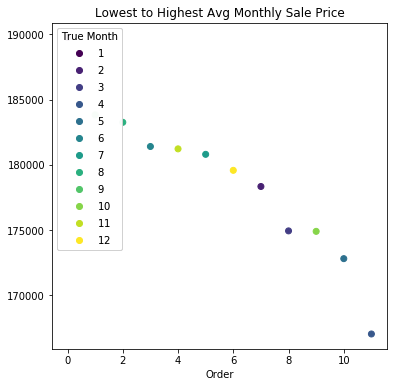

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(mo_sale.index, mo_sale['SalePrice'], c=mo_sale['MoSold'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="True Month")
ax.add_artist(legend1)
plt.title('Lowest to Highest Avg Monthly Sale Price')
plt.xlabel('Order')

**Conclusion:** We can create a re-ordered ordinal column for month and predict when the next best month to buy a house is. In addition, mortgage rates by month are not helpful, but mortgage rates are correlated with price on an annual basis. Unfortunately, the trend is in the opposite direction than we would expect, so it may not be useful.

# Analysis of Year Built

In [33]:
housing['BeenRemod'] = np.where(housing.YearRemodAdd != housing.YearBuilt, 1, 0)

In [34]:
housing[['YearBuilt','YearRemodAdd','BeenRemod']].sample(5)

,YearBuilt,YearRemodAdd,BeenRemod
843,1925,1950,1
126,1963,1963,0
1131,1976,1976,0
1777,2007,2008,1
465,1980,1980,0


In [35]:
housing_year = housing[housing['BeenRemod']==0].groupby('YearBuilt').agg({'SalePrice':['count', 'mean', 'std', 'max', 'min']})
housing_year.head()

SalePrice                                            
              count           mean           std     max    min
YearBuilt                                                      
1950             20  114707.500000  19762.912335  152000  81400
1951             12  126116.666667  22031.375698  155000  81500
1952             10  121840.000000  20835.610542  166000  82000
1953             18  142650.000000  35346.956771  225000  93000
1954             24  132087.125000  27318.649230  224000  93000

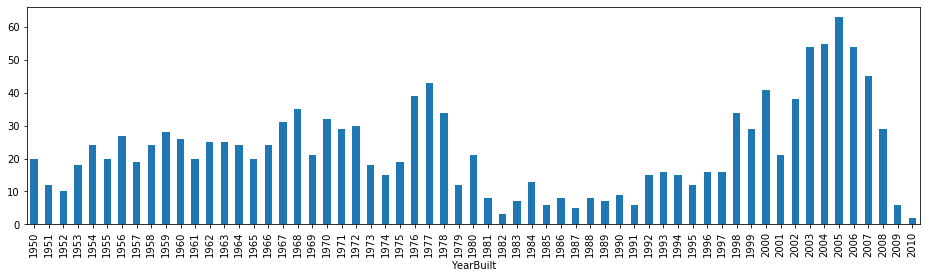

In [36]:
housing_year[('SalePrice','count')].plot(kind='bar', figsize=(16,4))

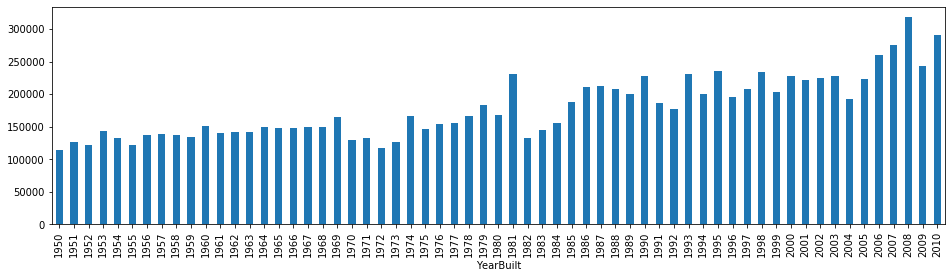

In [37]:
housing_year[('SalePrice','mean')].plot(kind='bar', figsize=(16,4))

**Conclusion:** Slight linear trend in price over time

# Compare Annual Sale Price with Mortgage Rates

In [38]:
FRM = pd.read_csv('data/mortgage_rates.csv')
FRM = FRM.merge(housing.groupby(['YrSold','MoSold']).agg({'SalePrice':'mean'}), left_on=['Year', 'Month'], right_on=['YrSold','MoSold'])

Text(0, 0.5, 'Monthly Average Sale Price')

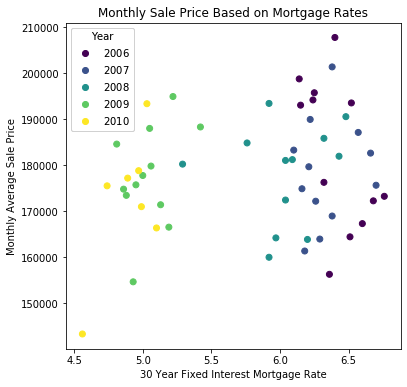

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = plt.scatter(FRM['FRM'], FRM['SalePrice'], c=FRM['Year'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Year")
ax.add_artist(legend1)
plt.title('Monthly Sale Price Based on Mortgage Rates')
plt.xlabel('30 Year Fixed Interest Mortgage Rate')
plt.ylabel('Monthly Average Sale Price')

Text(0, 0.5, 'Annual Average Sale Price')

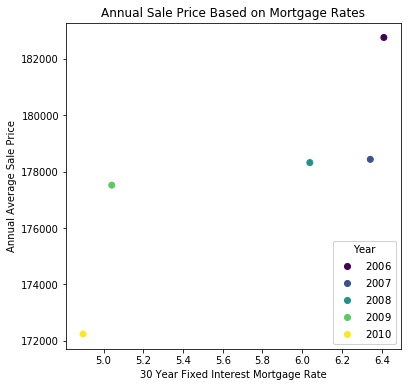

In [40]:
FRM2 = FRM.groupby('Year').agg({'SalePrice':'mean', 'FRM':'mean'})

fig, ax = plt.subplots(figsize = (6,6))
scatter = plt.scatter(FRM2['FRM'], FRM2['SalePrice'], c=list(FRM2.index))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Year")
ax.add_artist(legend1)
plt.title('Annual Sale Price Based on Mortgage Rates')
plt.xlabel('30 Year Fixed Interest Mortgage Rate')
plt.ylabel('Annual Average Sale Price')

**Conclusion:** Opposite trend between mortgage rates and sale price - consider dropping the variable

# Binary Features (HasBLANK)

Exploring the binary categories to determine if they are significant

In [41]:
housing['BeenRemod'] = np.where(housing.YearBuilt != housing.YearRemodAdd, 1, 0)
housing['HasFinBsmt'] = np.where(housing.BsmtFinSF1 > 0, 1, 0)
housing['HasFinGarage'] = np.where(housing.GarageFinish == "Fin", 1, 0)
housing['HasPool'] = np.where(housing.PoolArea > 0, 1, 0)
housing['HasFireplace'] = np.where(housing.Fireplaces > 0, 1, 0)
housing['PorchTotSF'] = housing.OpenPorchSF + housing.EnclosedPorch + housing['3SsnPorch'] + housing.ScreenPorch
housing['HasPorch'] = np.where(housing.PorchTotSF > 0, 1, 0)
housing['HasDeck'] = np.where(housing.WoodDeckSF > 0, 1, 0)

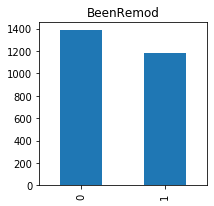

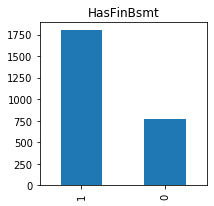

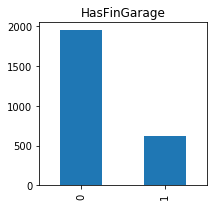

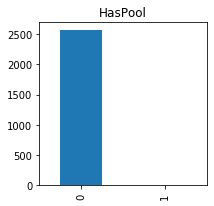

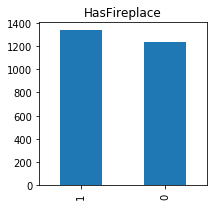

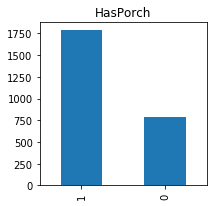

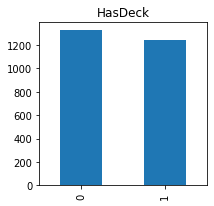

In [42]:
cols = ['BeenRemod', 'HasFinBsmt', 'HasFinGarage', 'HasPool', 'HasFireplace', 'HasPorch', 'HasDeck']
for col_ in cols:
    plt.figure(figsize=(3,3))
    housing[col_].value_counts().plot(kind='bar')
    plt.title(col_)

In [43]:
from scipy import stats
for col_ in cols:
    print('Does ' + col_ + ' have a significant effect?\n')
    print(housing.groupby(col_).agg({'SalePrice':['mean','std']})/1000)
    a = housing[housing[col_]==0].SalePrice
    b = housing[housing[col_]==1].SalePrice
    t, p = stats.ttest_ind(a, b)
    print('\nUsing a paired t-test, the t-score is %f, and the p value is %f \n' % (t,p))
    diff_ = np.mean(b-a)/1000
    print('On average, houses with ' + col_ + ' are worth %.0f thousand more dollars.\n' % diff_)

Does BeenRemod have a significant effect?

            SalePrice           
                 mean        std
BeenRemod                       
0          181.818730  70.327479
1          173.901153  77.778121

Using a paired t-test, the t-score is 2.710148, and the p value is 0.006770 

On average, houses with BeenRemod are worth nan thousand more dollars.

Does HasFinBsmt have a significant effect?

             SalePrice           
                  mean        std
HasFinBsmt                       
0           158.528381  62.802092
1           186.575317  76.728772

Using a paired t-test, the t-score is -8.947201, and the p value is 0.000000 

On average, houses with HasFinBsmt are worth nan thousand more dollars.

Does HasFinGarage have a significant effect?

               SalePrice           
                    mean        std
HasFinGarage                       
0             161.361142  60.117890
1             231.081579  87.324976

Using a paired t-test, the t-score is -22.34657

**Conclusion:** All of these features are significantly related to the sale price. Are they correlated?

In [44]:
housing[cols].corr()

,BeenRemod,HasFinBsmt,HasFinGarage,HasPool,HasFireplace,HasPorch,HasDeck
BeenRemod,1.000000,-0.133599,-0.056336,-0.041608,0.021768,0.110058,-0.041568
HasFinBsmt,-0.133599,1.000000,0.071139,-0.004342,0.094249,-0.059555,0.091547
HasFinGarage,-0.056336,0.071139,1.000000,0.028178,0.285546,0.132710,0.227598
HasPool,-0.041608,-0.004342,0.028178,1.000000,0.043819,-0.003619,0.034875
HasFireplace,0.021768,0.094249,0.285546,0.043819,1.000000,0.227732,0.217725
HasPorch,0.110058,-0.059555,0.132710,-0.003619,0.227732,1.000000,0.040010
HasDeck,-0.041568,0.091547,0.227598,0.034875,0.217725,0.040010,1.000000


**Conclusion:** weak correlation b/t HasFireplace and HasDeck and b/t HasFireplace and HasDeck

# Non-Linear Combinations of HasBLANK 

Dropping column: 'BeenRemodHasPool' with less than 8 observations
Dropping column: 'HasFinBsmtHasPool' with less than 8 observations
Dropping column: 'HasFinGarageHasPool' with less than 8 observations
Dropping column: 'HasPoolHasFireplace' with less than 8 observations
Dropping column: 'HasPoolHasPorch' with less than 8 observations

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



Dropping column: 'HasPoolHasDeck' with less than 8 observations


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247AE4E51C8>,
      dtype=object)

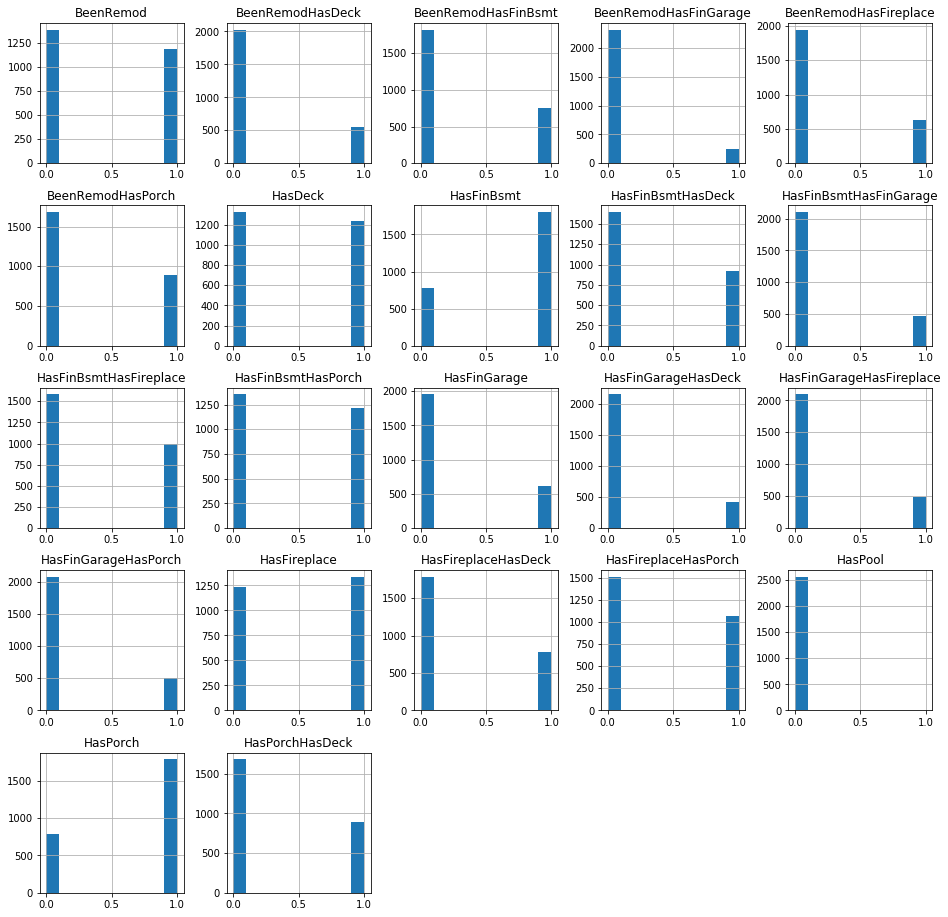

In [45]:
x1 = housing[cols]
i = 1
n = 8
for col1 in cols:    # generate interaction columns
    for col2 in cols[i:]:
        new_col = col1 + col2
        x1[new_col] = x1[col1] * x1[col2]
        # drop if no new information
        new_sum = np.sum(x1[new_col])
        if (new_sum == np.sum(x1[col1])) or (new_sum == np.sum(x1[col2])):
            x1 = x1.drop(new_col, axis=1)
            print("Dropping column: '%s' for providing no new information" % new_col)
        elif (new_sum < 9):
            x1 = x1.drop(new_col, axis=1)
            print("Dropping column: '%s' with less than %i observations" % (new_col, n))
    i = i+1
        
x1.hist(figsize=(16,16))

Lasso(alpha=2.9150530628251757e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 2.9150530628251757e-05}
0.6795139686056872


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

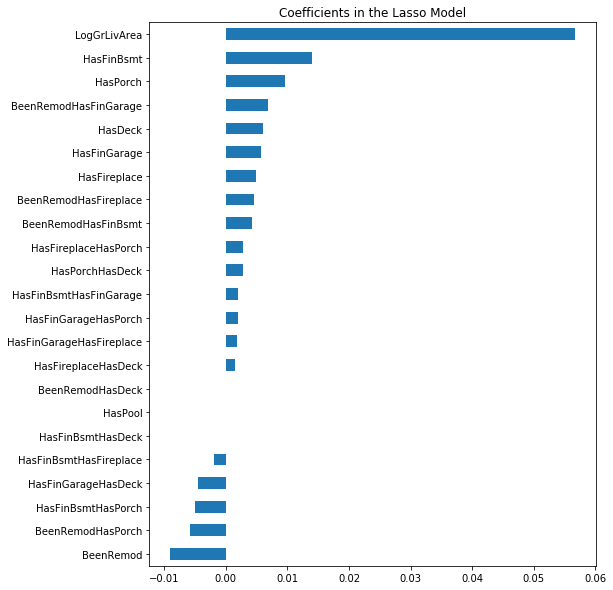

In [46]:
from sklearn.linear_model import Lasso
from sklearn import model_selection

housing['LogSalePrice'] = np.log(housing.SalePrice)
housing['LogGrLivArea'] = np.log(housing.GrLivArea)

x1['LogGrLivArea'] = housing['LogGrLivArea']
y = housing['LogSalePrice']
y = np.log(y)

param_grid={'alpha': np.logspace(-5, -3, 100)}
grid_search = model_selection.GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv=3)
grid_search.fit(x1, y)

print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

alpha_cv = grid_search.best_estimator_.get_params()['alpha']

lasso = Lasso(alpha = alpha_cv).fit(x1, y)
coef = pd.Series(lasso.coef_, index = x1.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (8, 10))
plt.title("Coefficients in the Lasso Model")

**Conclusion:** There are a couple feature interactions that could be useful, like Fireplace + Porch, Porch + Deck, and FinGarage + FinBasement. However, these are not good candidates for the model because they are difficult to integrate into the app.

# Feature Selection for Utility Varaibles

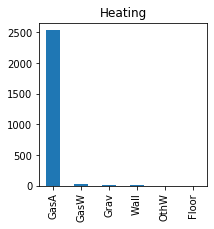

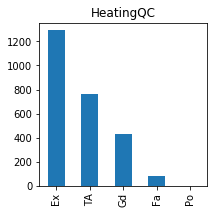

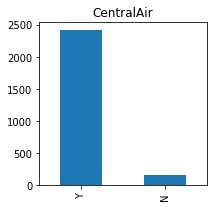

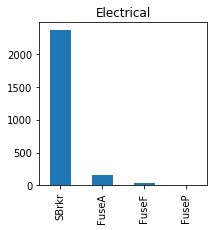

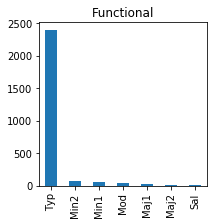

In [55]:
util_cols = ['Heating','HeatingQC','CentralAir','Electrical','Functional']
for col_ in util_cols:
    plt.figure(figsize=(3,3))
    housing[col_].value_counts().plot(kind='bar')
    plt.title(col_)

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Lasso(alpha=2.4201282647943835e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 2.4201282647943835e-05}
0.66633897052104


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

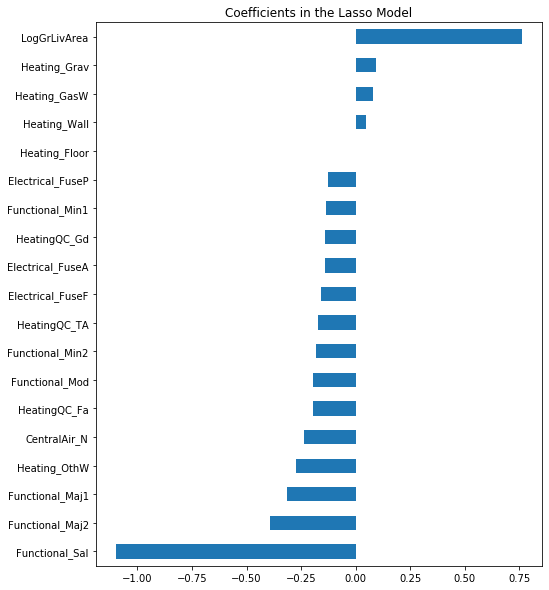

In [56]:
housing_utils = housing[util_cols]
housing_utils['LogGrLivArea'] = housing['LogGrLivArea']
housing_utils['LogSalePrice'] = housing['LogSalePrice']
housing_utils = housing_utils.dropna()
housing_utils_dummified = pd.get_dummies(housing_utils).drop(['Heating_GasA','HeatingQC_Ex','HeatingQC_Po','Electrical_SBrkr','Functional_Typ', 'CentralAir_Y'], axis=1)

x4 = housing_utils_dummified.drop('LogSalePrice', axis = 1)
y = housing_utils['LogSalePrice']

grid_search.fit(x4, y)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

alpha_cv = grid_search.best_estimator_.get_params()['alpha']
lasso = Lasso(alpha = alpha_cv).fit(x4, y)
coef = pd.Series(lasso.coef_, index = x4.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (8, 10))
plt.title("Coefficients in the Lasso Model")

**Conclusion:** Some of the utility variables are good candidats to make binary, and it's worth deleting the functional varaible

# Feature Selection for Garage Variables

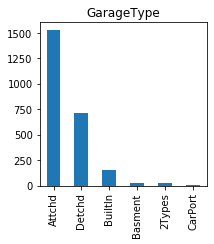

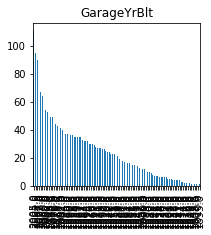

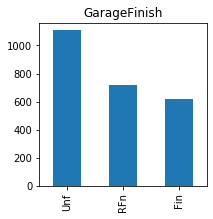

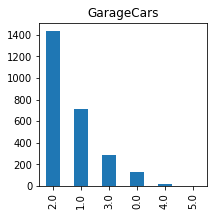

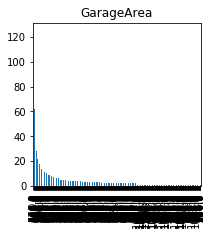

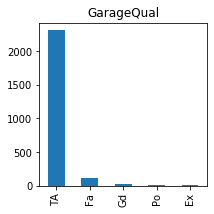

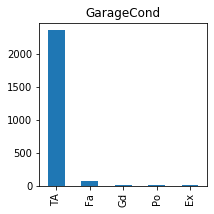

In [53]:
garage_cols = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
for col_ in garage_cols:
    plt.figure(figsize=(3,3))
    housing[col_].value_counts().plot(kind='bar')
    plt.title(col_)

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Lasso(alpha=0.0001291549665014884, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0001291549665014884}
0.7402175945828734


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

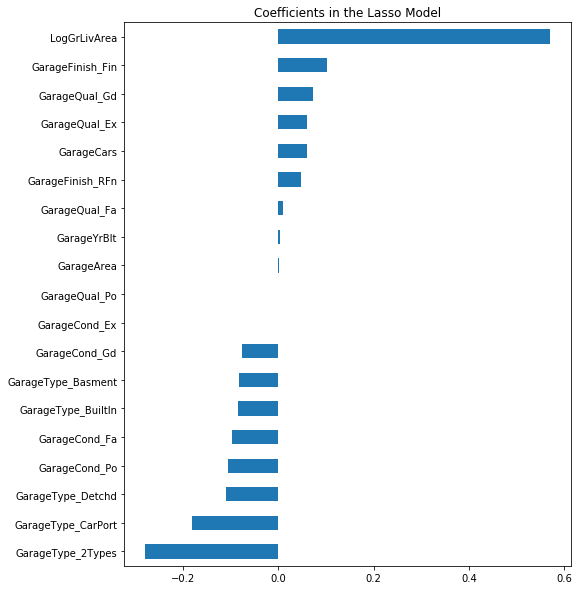

In [54]:
housing_garages = housing[garage_cols]
housing_garages['LogGrLivArea'] = housing['LogGrLivArea']
housing_garages['LogSalePrice'] = housing['LogSalePrice']
housing_garages = housing_garages.dropna()
housing_garages_dummified = pd.get_dummies(housing_garages).drop(['GarageType_Attchd','GarageFinish_Unf','GarageQual_TA','GarageCond_TA'], axis=1)

x3 = housing_garages_dummified.drop('LogSalePrice', axis = 1)
y = housing_garages['LogSalePrice']

grid_search.fit(x3, y)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

alpha_cv = grid_search.best_estimator_.get_params()['alpha']
lasso = Lasso(alpha = alpha_cv).fit(x3, y)
coef = pd.Series(lasso.coef_, index = x3.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (8, 10))
plt.title("Coefficients in the Lasso Model")

**Conclusions:** Lasso penalized regression eliminates several garage varaibles, including the garage area, garage year built, and most interestingly, the garage *quality*. The most important positive varaibles are the number of cars and whether the garage is finished or not (consider combining Fin + RFN). The most important negative variables are unattached garages (consider combining all unattached) and having a fair/poor garage condition (consider combining).

# Feature Selection for Overall Quality/Condition

In [47]:
over = housing[['OverallQual', 'OverallCond']]

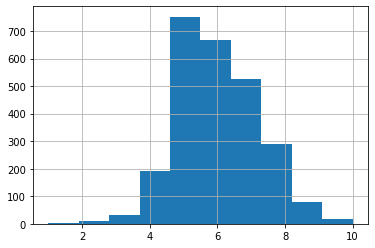

In [48]:
over.OverallQual.hist()

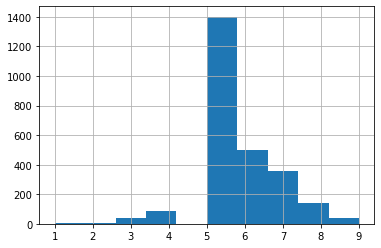

In [49]:
over.OverallCond.hist()

In [51]:
over.OverallQual = over.OverallQual.astype(str)
over.OverallCond = over.OverallCond.astype(str)
over['LogSalePrice'] = np.log(housing.SalePrice)
over['LogGrLivArea'] = np.log(housing.GrLivArea)
over['LogLotArea'] = np.log(housing.LotArea)
over = over.dropna()
overall_dummified = pd.get_dummies(over).drop(['OverallQual_5', 'OverallCond_5'], axis=1)

D:\Software\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 1e-05}
0.8163683780390985


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

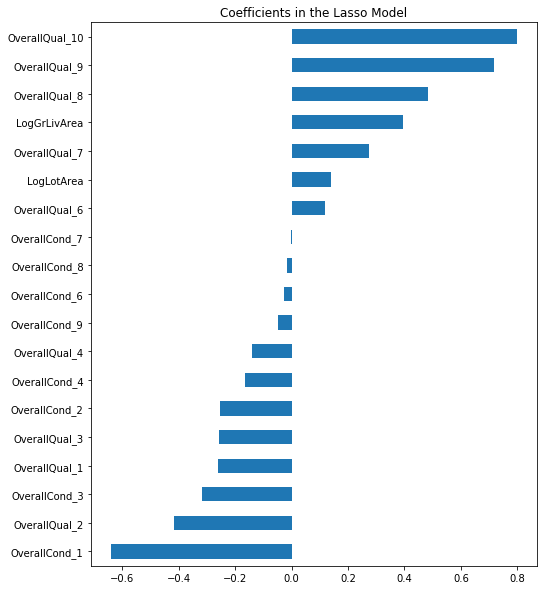

In [52]:
x2 = overall_dummified.drop(['LogSalePrice'], axis=1)
y = overall_dummified['LogSalePrice']

param_grid={'alpha': np.logspace(-5, -3, 100)}
grid_search = model_selection.GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv=3)
grid_search.fit(x2, y)

print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

alpha_cv = grid_search.best_estimator_.get_params()['alpha']

lasso = Lasso(alpha = alpha_cv).fit(x2, y)
coef = pd.Series(lasso.coef_, index = x2.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (8, 10))
plt.title("Coefficients in the Lasso Model")

**Conclusion:** Consider stratifying the Quality High/Avg/Low as (10-7)/(6-4)/(3-1) and Condition High/Avg/Low as (9-6)/(5)/(4-1)